In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1392\435000976.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv(r"C:\Users\lenovo\Downloads\CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
df

name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner  
0     Petrol  Individual       Manual   First Owner  
1     Petrol  Individual       Manual   First Owner  
2     Diesel  Individual       Manual   First Owner  
3     Petrol  Individual       Manual   First Owner  
4     Diesel  Individual       Manual  Second Owner  
...      ...         ...          ...           ...  
4335  Diesel  Individual       Manual  Second Owner  
4336  Diesel  Individual       Manual  Second Owner  
4337  Petrol  Individual       Manual  Second Owner  
4338  Diesel  Individual       Manual   First Owner  
4339  Petrol  Individual       Manual   First Owner  

[4340 rows x 8 columns]

In [4]:
df.describe()

year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
df.corr(numeric_only = True)

year  selling_price  km_driven
year           1.000000       0.413922  -0.419688
selling_price  0.413922       1.000000  -0.192289
km_driven     -0.419688      -0.192289   1.000000

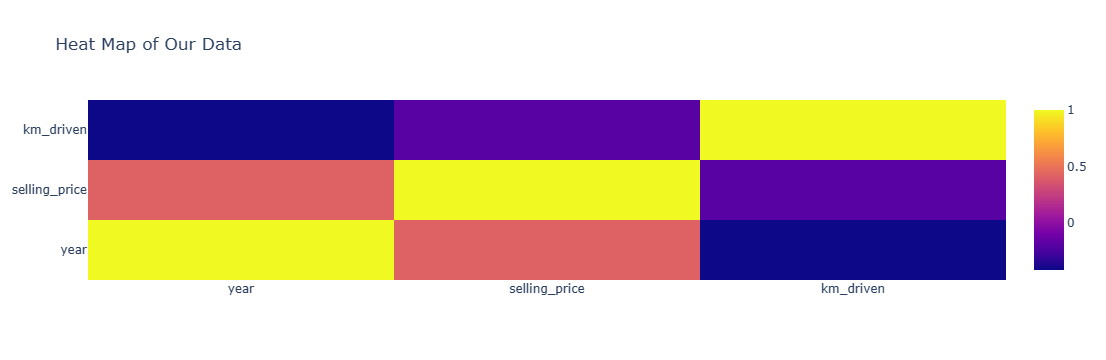

In [7]:
trace = go.Heatmap(z=df.corr(numeric_only = True),x = df.corr(numeric_only = True).columns,y =df.corr(numeric_only = True).columns)
data = [trace]
layout = go.Layout(title='Heat Map of Our Data')
fig = go.Figure(data=data, layout=layout)

# Use pyo.iplot(fig) for Jupyter Notebook or JupyterLab
pyo.iplot(fig)

Description of all columns 
- numerical columns
  - selling_price, Km_driven,year
- categorical columns
  - fuel,tranmission,owner
- mixied colmuns 
  - name 

# only univariate numeric colmuns

In [8]:
def single(y,x):
    print(f'Discribe Five number summary in {x} columns: {y[[x]].describe()}')
    print(f'data Skwness: {y[x].skew()}')
    print(f'variance in this data: {y[x].var()}')
    plt.figure(figsize = (12,10))
    plt.subplot(2,2,1)
    print(sns.histplot(y[x],bins = 20))
    plt.subplot(2,2,2)
    print(sns.kdeplot(y[x]))
    plt.subplot(2,2,3)
    print(sns.boxplot(y[x]))
    plt.show()
    

In [9]:
def find_outlier(y,x):
    q3 = np.percentile(y[x],75) 
    q1  = np.percentile(y[x],25) 
    iqr = q3  - q1
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5 * iqr
    print(f'''25%tile: {q1} 
75%tile : {q3}''')
    print(f'Total Iqr {iqr}')
    print(f"""Lower Boundry: {lb}
upper boundry: {ub}""")
    print(f'{len(y[y[x] > ub].sort_values(by = x))/len(y[x]) *100}%tile outlier in this data(positive)')
    print(f'{len(y[y[x] < lb].sort_values(by = x,ascending = False))/len(y[x]) *100}%tile outlier in this data(negetive)')
    return 

In [10]:
def cate(y,x):
    f = y[x].value_counts()
    print(f)
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    ax = sns.countplot(x = y[x])
    plt.subplot(1,2,2)
    l = f.index
    plt.pie(f,labels = l,autopct = '%0.1f%%')


## selling_price
cnclusion
- there are 6%(approx) outlier in this data
- there no missing values in this data 
-  data is highly right skwed
- i have remove the outlier after analsys all numeric colmuns

Discribe Five number summary in selling_price columns:        selling_price
count   4.340000e+03
mean    5.041273e+05
std     5.785487e+05
min     2.000000e+04
25%     2.087498e+05
50%     3.500000e+05
75%     6.000000e+05
max     8.900000e+06
data Skwness: 4.892021472306356
variance in this data: 334718640087.90295
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



Axes(0.125,0.11;0.352273x0.35)


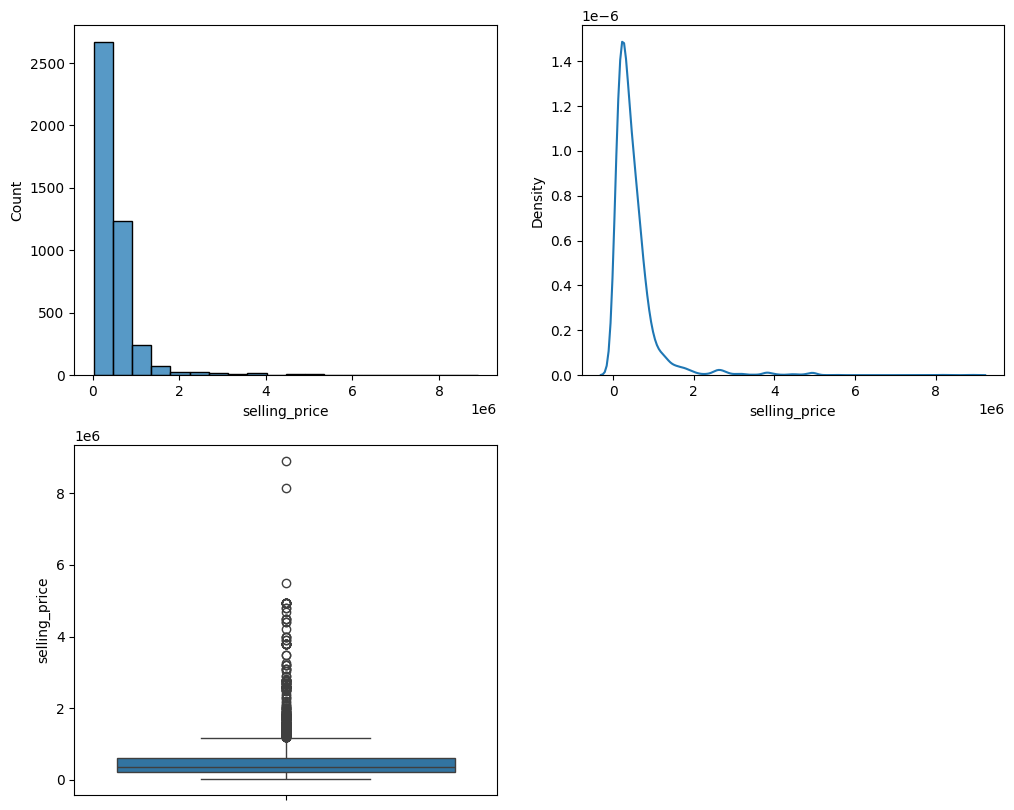

In [11]:
single(df,'selling_price') # user define funcation

In [12]:
find_outlier(df,'selling_price')

25%tile: 208749.75 
75%tile : 600000.0
Total Iqr 391250.25
Lower Boundry: -378125.625
upper boundry: 1186875.375
6.244239631336406%tile outlier in this data(positive)
0.0%tile outlier in this data(negetive)


## km_driven
coclusion
- there highly positive skwed 
-  there are some so many oulier in the data
- around 75%tile data below 90000 km_driven
- but the good think is approx (2.5)% outlier in the data

Discribe Five number summary in km_driven columns:            km_driven
count    4340.000000
mean    66215.777419
std     46644.102194
min         1.000000
25%     35000.000000
50%     60000.000000
75%     90000.000000
max    806599.000000
data Skwness: 2.6690569869843133
variance in this data: 2175672269.448949
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



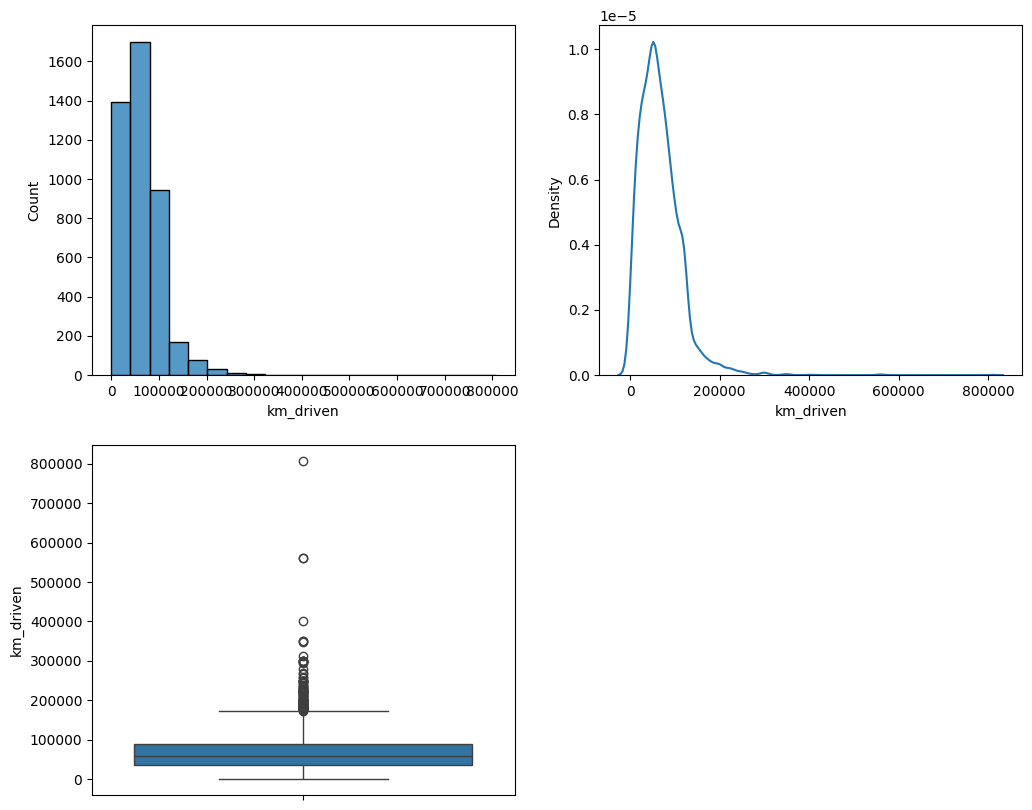

In [13]:
single(df,'km_driven') 

In [14]:
find_outlier(df,'km_driven')

25%tile: 35000.0 
75%tile : 90000.0
Total Iqr 55000.0
Lower Boundry: -47500.0
upper boundry: 172500.0
2.5345622119815667%tile outlier in this data(positive)
0.0%tile outlier in this data(negetive)


# year colmuns 
conclusion 
- there are left(negetive) skewed
-  there some outlier 
-  no missing values

Discribe Five number summary in year columns:               year
count  4340.000000
mean   2013.090783
std       4.215344
min    1992.000000
25%    2011.000000
50%    2014.000000
75%    2016.000000
max    2020.000000
data Skwness: -0.8332399429174567
variance in this data: 17.769124530169517
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



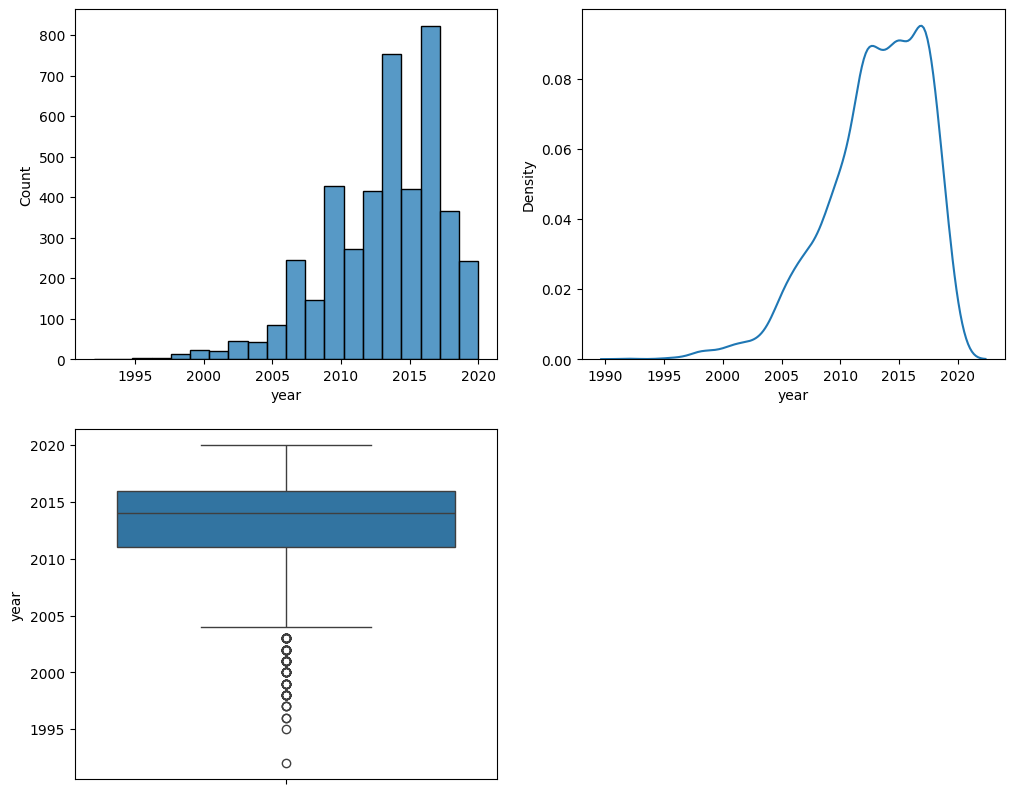

In [15]:
single(df,'year')

In [16]:
find_outlier(df,'year')

25%tile: 2011.0 
75%tile : 2016.0
Total Iqr 5.0
Lower Boundry: 2003.5
upper boundry: 2023.5
0.0%tile outlier in this data(positive)
2.4193548387096775%tile outlier in this data(negetive)


## i have remove all the outlier in the data and after the remove all the utlier.taking next step
conclusion 
- we have remove the 12%(approx) data in the data set. almost data is outlier free

In [17]:
df1 = df[(df['selling_price'] < 1186875.375 ) & (df['km_driven'] < 172500.0) & (df['year'] > 2003)]

In [18]:
df1.shape[0] / df.shape[0] *100

88.89400921658986

## selling_price column
conclusion 
- After the remove outlier  data are almost almost normal ditributed
-  there are some outier but is valid oulier
-  around 75% data present (approx) 5 lacs

Discribe Five number summary in selling_price columns:        selling_price
count   3.858000e+03
mean    4.009913e+05
std     2.462263e+05
min     2.000000e+04
25%     2.100000e+05
50%     3.500000e+05
75%     5.500000e+05
max     1.165000e+06
data Skwness: 0.7788102056876451
variance in this data: 60627399133.843636
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



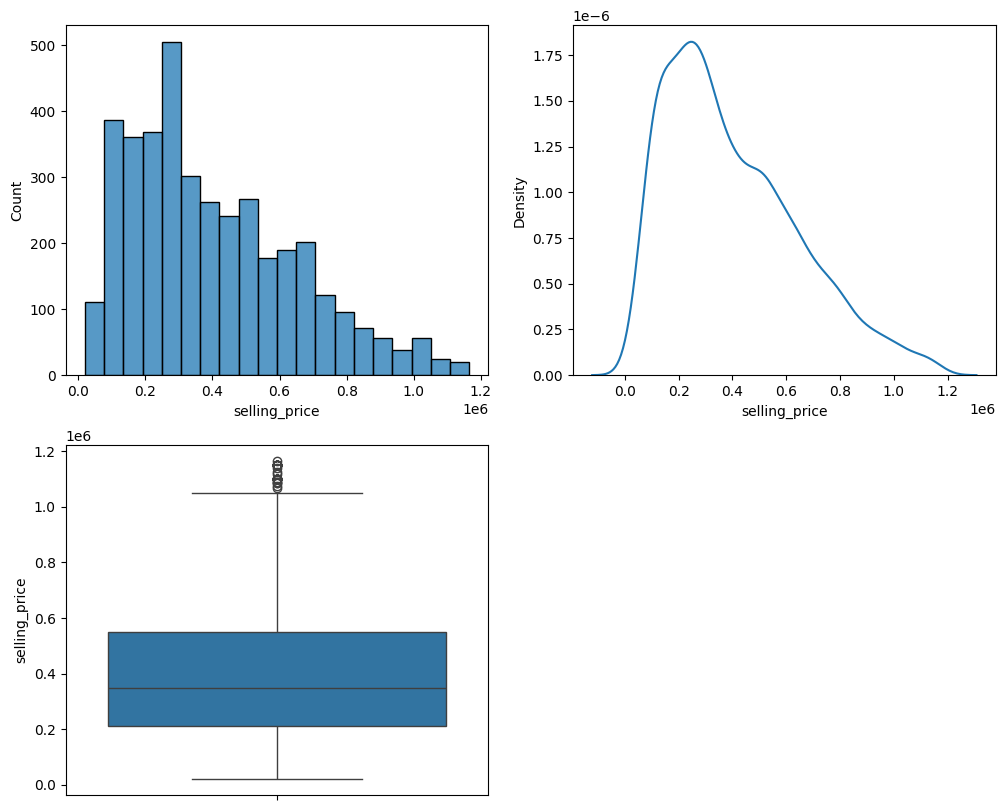

In [19]:
single(df1,'selling_price')

## km_driven
conclusion
- data is almost normal distributed 
- there no outlier show in the data

Discribe Five number summary in km_driven columns:            km_driven
count    3858.000000
mean    62669.352514
std     36308.575051
min         1.000000
25%     35000.000000
50%     60000.000000
75%     90000.000000
max    172000.000000
data Skwness: 0.46326904919798967
variance in this data: 1318312622.2293441
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



Axes(0.125,0.11;0.352273x0.35)


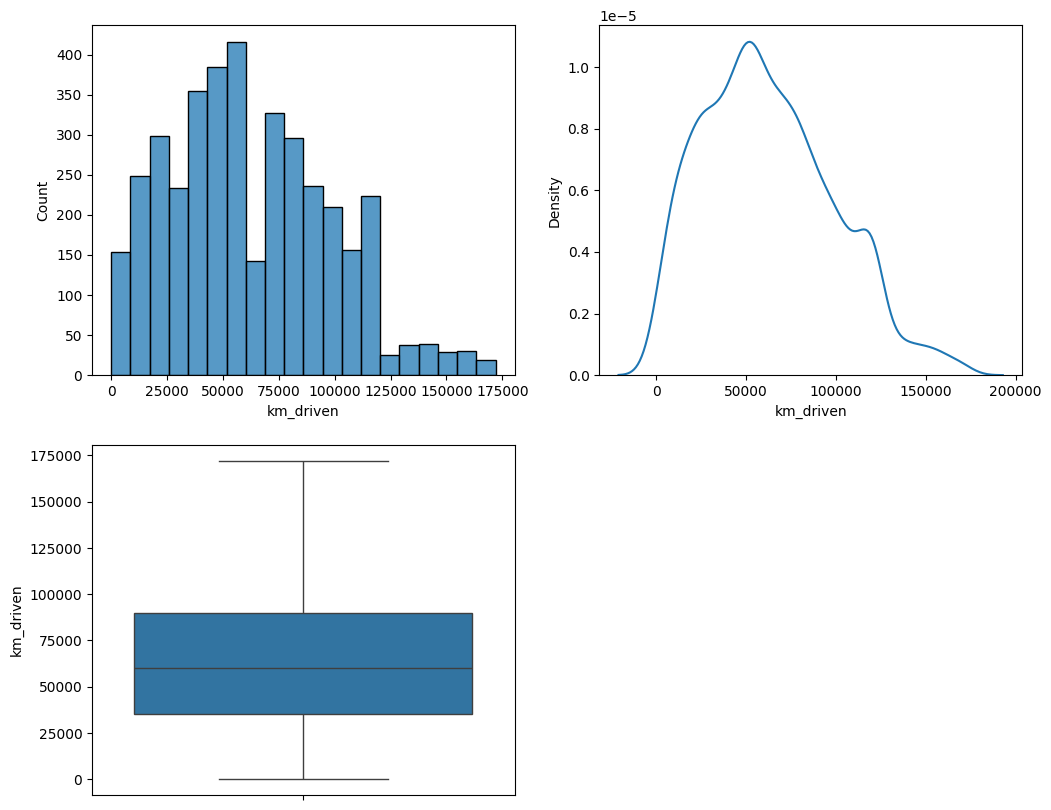

In [20]:
single(df1,'km_driven')

## year
coclusion
- data is almost normall distributed 
-  there are no outlier show

Discribe Five number summary in year columns:               year
count  3858.000000
mean   2013.284863
std       3.745810
min    2004.000000
25%    2011.000000
50%    2014.000000
75%    2016.000000
max    2020.000000
data Skwness: -0.453760980552056
variance in this data: 14.031095664296151
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



Axes(0.125,0.11;0.352273x0.35)


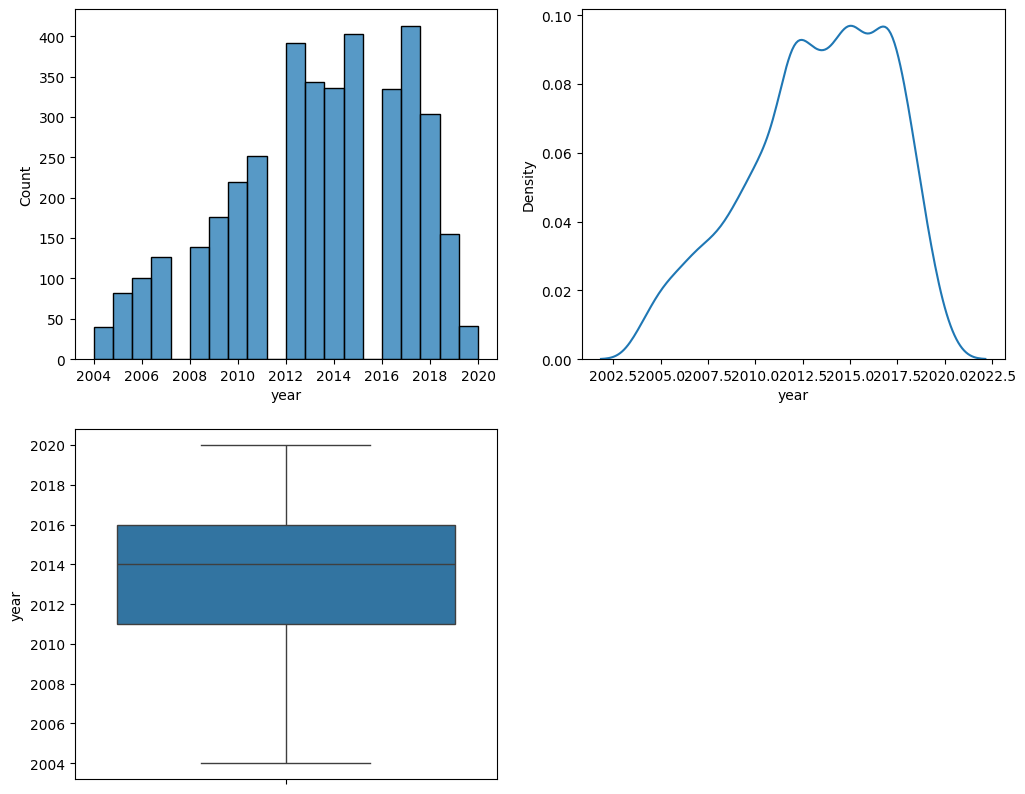

In [21]:
single(df1,'year')

## Fuel 
Conclusion
- There are mostly peoples purchased the diesel car Than after second fuel choose is the petrol
- There more than 50% market car is diesel fuel and 46%(approx) market is petrol


fuel
Petrol      1995
Diesel      1800
CNG           40
LPG           22
Electric       1
Name: count, dtype: int64


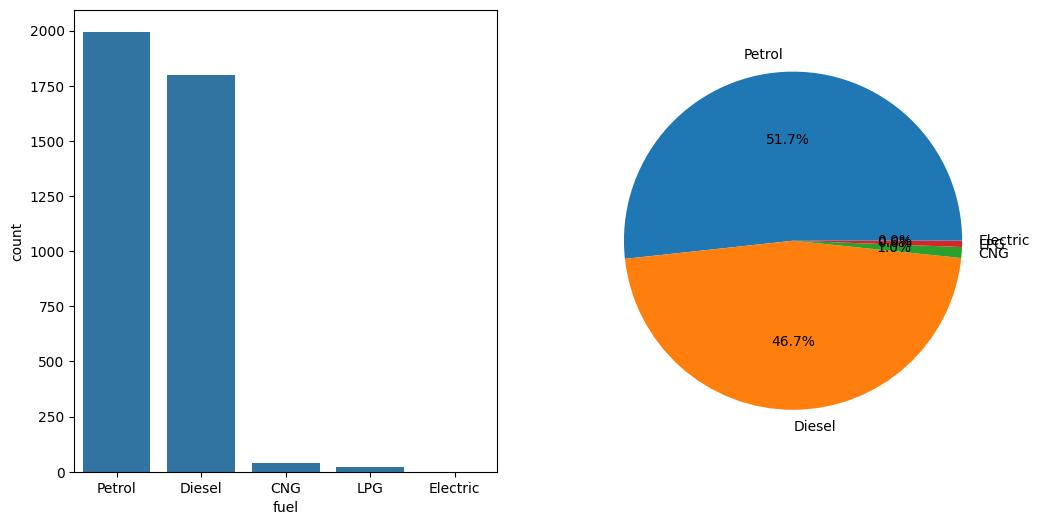

In [22]:
cate(df1,'fuel')

## seller_type
conclusion
- Mostly are Individual seller there are 75% (approx).that People are direct sell the car not taking help third person
- 22% car sell by the (dealer third party)

seller_type
Individual          2916
Dealer               853
Trustmark Dealer      89
Name: count, dtype: int64


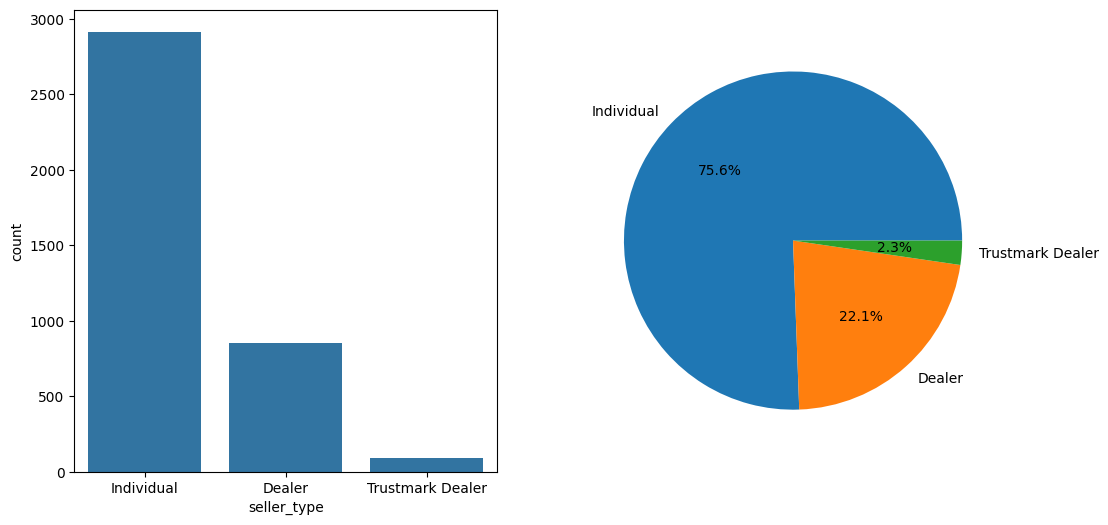

In [23]:
cate(df1,'seller_type')

## Transmission 
Conclusion
- Mostly cars are Manual Trasmission
- There above 90% cars are Manual

transmission
Manual       3609
Automatic     249
Name: count, dtype: int64


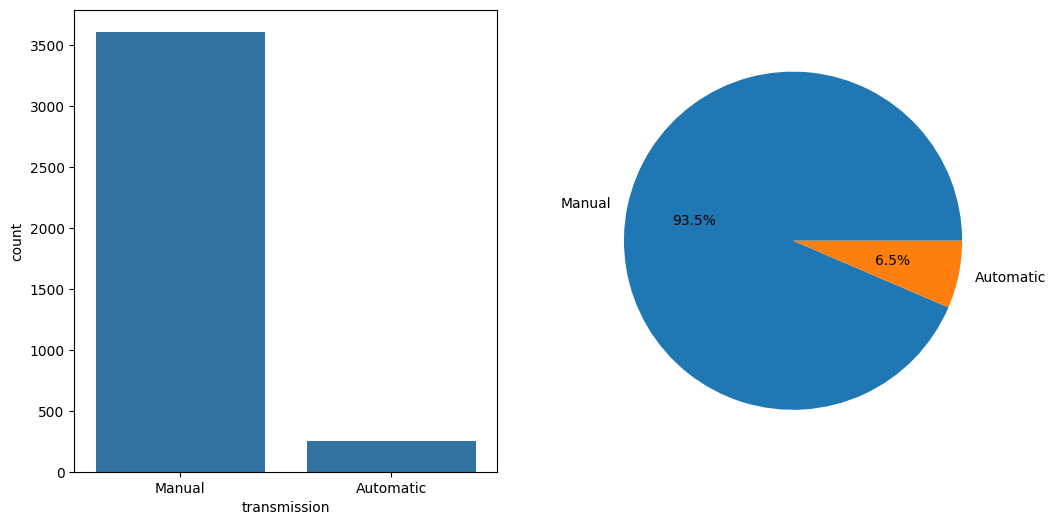

In [24]:
cate(df1,'transmission')

## Owner Type
Conclusion 
- Mostly Seller People are First Owner.There are more 65% cars are selling by the First Owner
- Second Owners are selling only 26% cars

owner
First Owner             2526
Second Owner            1011
Third Owner              247
Fourth & Above Owner      60
Test Drive Car            14
Name: count, dtype: int64


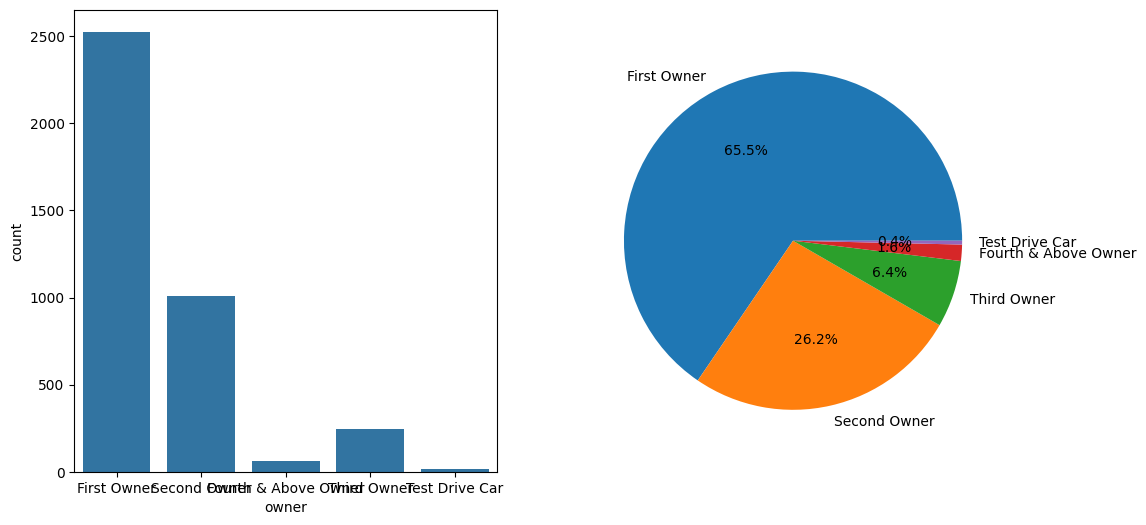

In [25]:
cate(df1,'owner')

In [26]:
df1.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

## Name Is Represent the car Name (model name)
Conclusion
- Top seller car is Maruti swift Diesel.
- And second think is top 10 mostly selling cars.mostly 10 out Of 8(approx) car manufature from maruti company

In [27]:
d = df['name'].value_counts().reset_index().head(10)
trace = go.Bar(x = d['name'],y = d['count'],
                  marker = {'color':'#0feee5'})

data  = [trace]
layout = go.Layout(title = 'Top 10 selling car',
                          xaxis = {'title': 'Model'},
                          yaxis = {'title': 'No.Of.Cars'})
fig= go.Figure(data = data,layout = layout)
pyo.plot(fig)

'temp-plot.html'

## Biavariate 

In [28]:
def bia(a,b,c,z):
    plt.figure(figsize = (18,10))
    plt.subplot(2,2,1)
    sns.scatterplot(x = a[b],y = a[c])
    plt.subplot(2,2,2)
    sns.heatmap(z,annot = True,cmap = 'coolwarm')
    plt.subplot(2,2,3)
    sns.countplot(x = a[c])
    plt.show()

In [29]:
def price(data):
    if data < 300000: return 'Under 3 Lac'
    elif data > 300000 and data < 700000: return '3 - 7 Lac'
    else: return 'Above 7 Lac'
df1['Price']  = df1.selling_price.apply(price)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1392\3482916532.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
def run(data):
    if data < 50000: return 'Under 50000'
    elif data >= 50000 and data <= 100000: return '50K - 1 Lac'
    elif data > 100000 and data <150000: return '1L - 1.5Lac'
    else: return 'Above 1.5Lac'
df1['Running']  = df1.km_driven.apply(run)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1392\199306368.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Price to Running
conclusion
- The Cars are selling Price under 3 Lac.around 50K - 1Lac km Running.
- the price Across 7 lac the more than 50% cars are running under the 50k km

Running      1L - 1.5Lac  50K - 1 Lac  Above 1.5Lac  Under 50000
Price                                                           
3 - 7 Lac      10.245129    43.494657      1.948460    44.311754
Above 7 Lac     8.946609    36.796537      1.298701    52.958153
Under 3 Lac    17.407878    56.099111      2.160102    24.332910


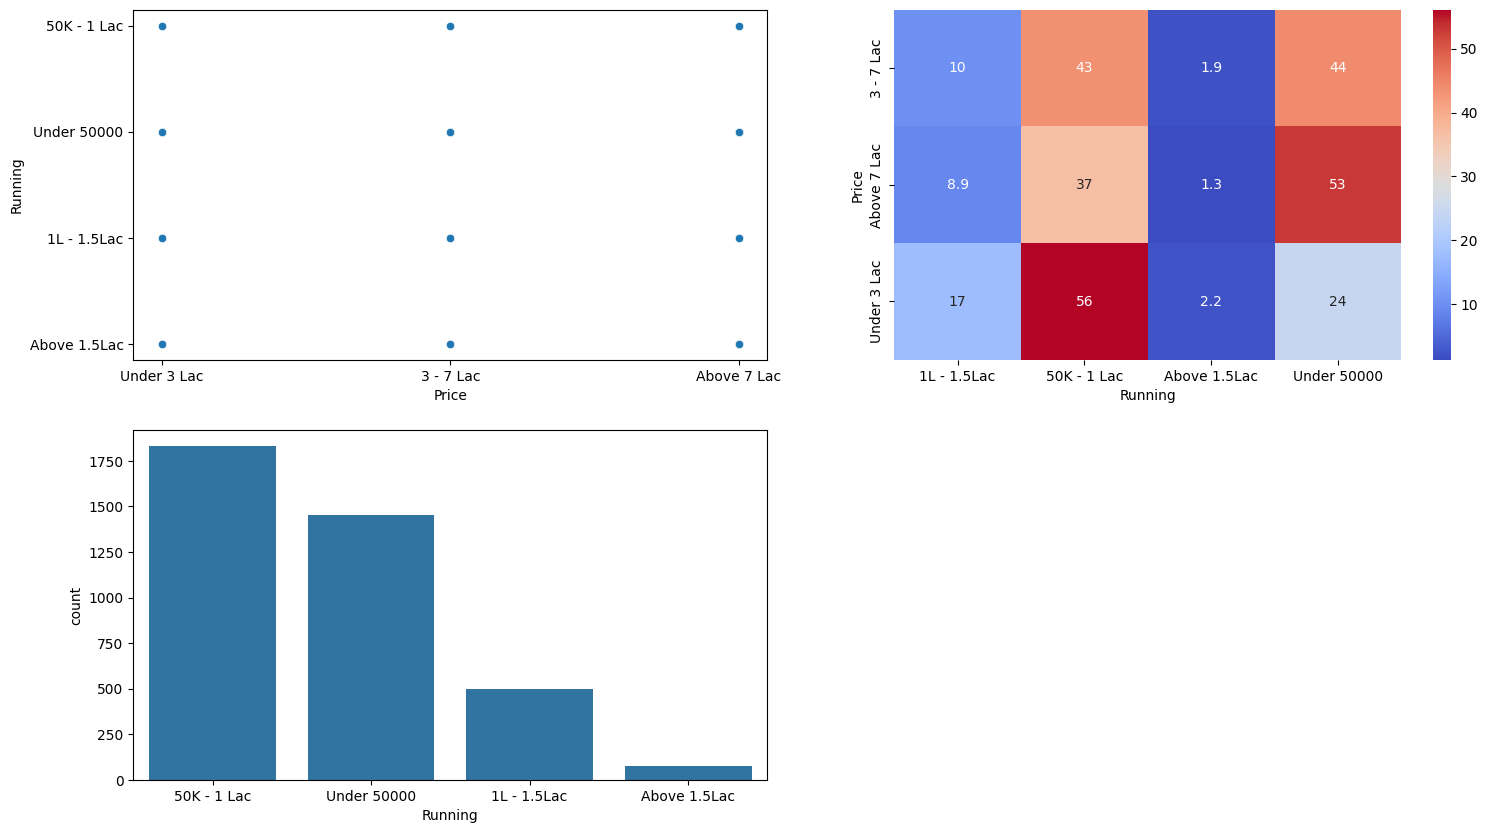

In [31]:
b = pd.crosstab(df1['Price'],df1['Running'],normalize = 'index')*100
print(b)
bia(df1,'Price','Running',b)


In [32]:
df1[(df1['Running'] == 'Above 1.5Lac') & (df1['Price'] == 'Above 7 Lac')]

name  year  selling_price  \
234           Toyota Innova 2.5 V Diesel 7-seater  2011        1075000   
235                        Honda Mobilio V i DTEC  2014         300000   
236   Toyota Innova 2.5 G (Diesel) 7 Seater BS IV  2010         700000   
245                        Honda Mobilio V i DTEC  2014         300000   
1019                  Mitsubishi Pajero Sport 4X4  2012        1025000   
1257                       Nissan Sunny Diesel XV  2012         300000   
1499                       Mahindra XUV500 W8 4WD  2014         800000   
3319               Renault Duster 85PS Diesel RxL  2016         700000   
4072          Toyota Innova 2.5 V Diesel 8-seater  2012         800000   

      km_driven    fuel seller_type transmission                 owner  \
234      160000  Diesel  Individual       Manual          Second Owner   
235      150000  Diesel  Individual       Manual           First Owner   
236      163000  Diesel  Individual       Manual  Fourth & Above Owner   
245      150000  Diesel  Individual       Manual           First Owner   
1019     167870  Diesel      Dealer       Manual          Second Owner   
1257     170000  Diesel  Individual       Manual           First Owner   
1499     156000  Diesel  Individual       Manual           First Owner   
3319     160000  Diesel  Individual       Manual           First Owner   
4072     160000  Diesel      Dealer       Manual           First Owner   

            Price       Running  
234   Above 7 Lac  Above 1.5Lac  
235   Above 7 Lac  Above 1.5Lac  
236   Above 7 Lac  Above 1.5Lac  
245   Above 7 Lac  Above 1.5Lac  
1019  Above 7 Lac  Above 1.5Lac  
1257  Above 7 Lac  Above 1.5Lac  
1499  Above 7 Lac  Above 1.5Lac  
3319  Above 7 Lac  Above 1.5Lac  
4072  Above 7 Lac  Above 1.5Lac

## Price To transmission
conclusion
- 98% cars are selling under the 3 lac.manuall Transmission
- if you are purchase the automatic tranmission car you go above 7lac Bugets

transmission  Automatic     Manual
Price                             
3 - 7 Lac      7.730987  92.269013
Above 7 Lac   13.852814  86.147186
Under 3 Lac    1.905972  98.094028


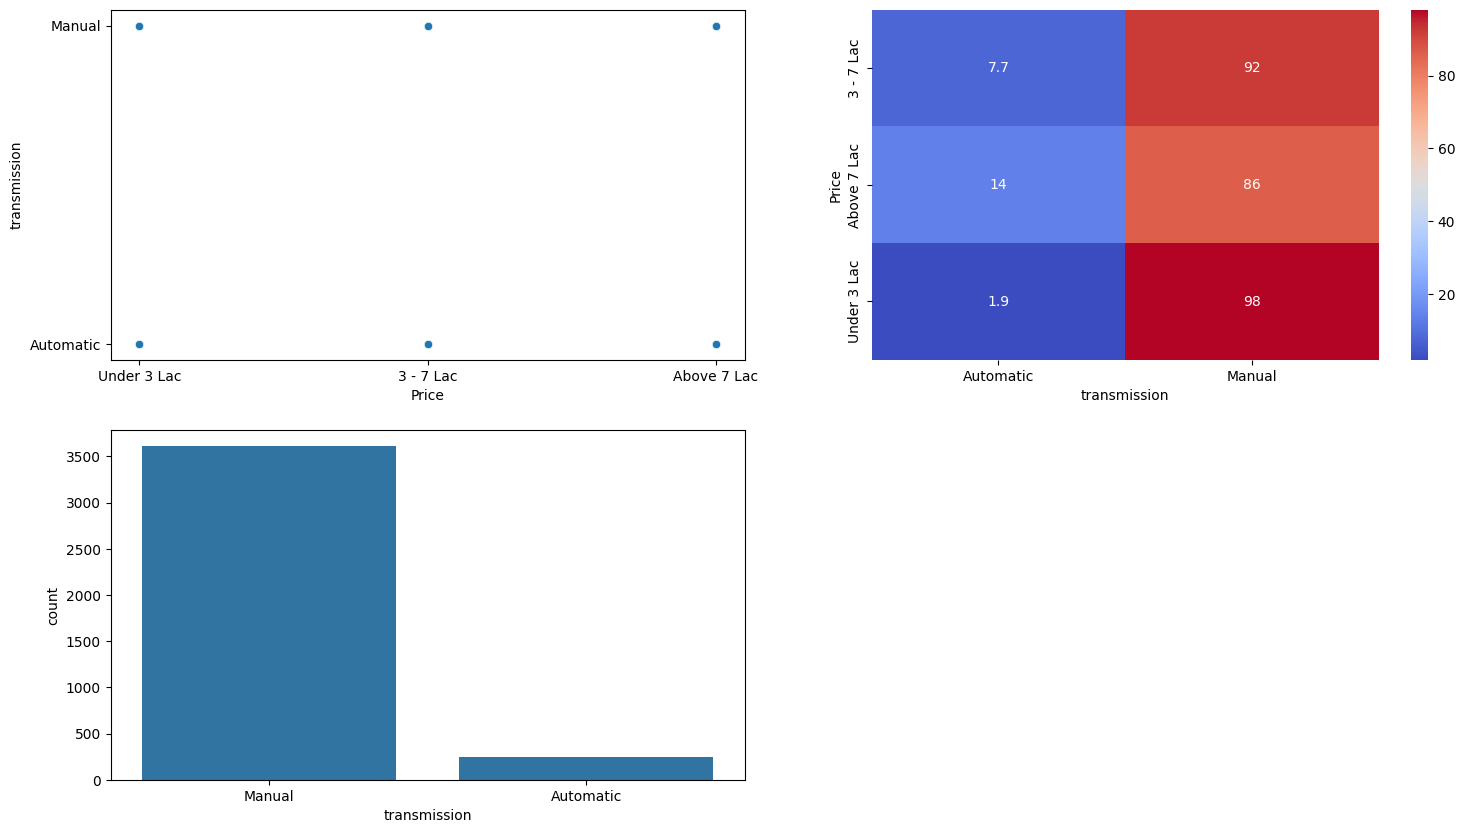

In [33]:
b = pd.crosstab(df1['Price'],df1['transmission'],normalize = 'index')*100
print(b)
bia(df1,'Price','transmission',b)


## price to fuel
conclusion
- mostly diesel cars are selling above 7lac price around 66% diesel fuel market
- other hand. mostly petrol cars are selling under the 3 lac around 67% petrol fuel market
- But 3 - 7 lac is the almost 50% - 50% fuel market 
- why are mostly sold petrol car in the data 
  - because the total sold car data round 40% cars are sold under the 3Lac

fuel              CNG     Diesel  Electric       LPG     Petrol
Price                                                          
3 - 7 Lac    0.942803  54.934004  0.062854  0.000000  44.060339
Above 7 Lac  0.288600  66.955267  0.000000  0.000000  32.756133
Under 3 Lac  1.461245  29.351970  0.000000  1.397713  67.789072


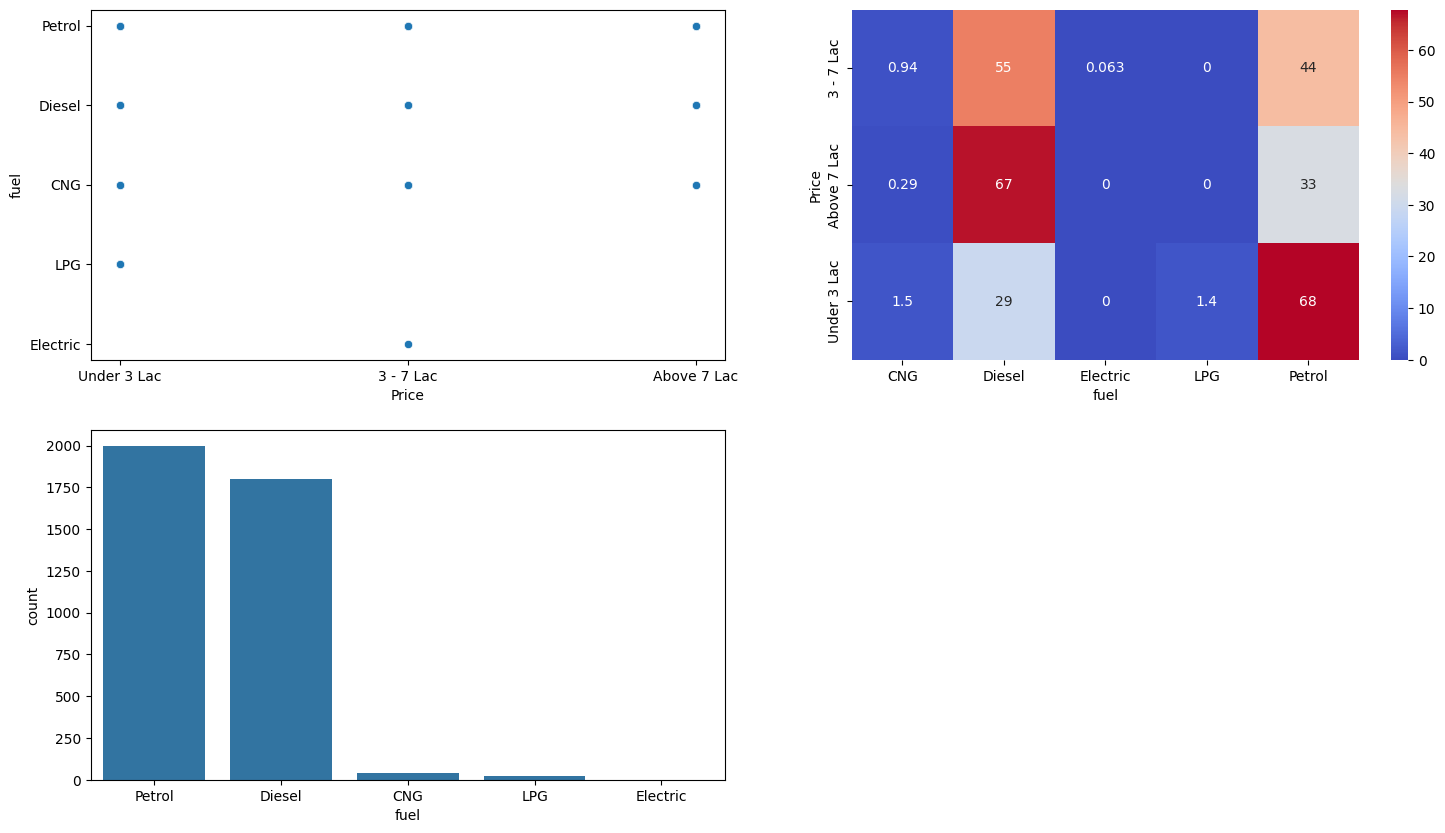

In [34]:
b = pd.crosstab(df1['Price'],df1['fuel'],normalize = 'index')*100
print(b)
bia(df1,'Price','fuel',b)


In [35]:
df1[df['selling_price'] < 300000].shape[0]/df1.shape[0]*100

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1392\1727059077.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



40.7983411093831

## Price to seller_type
conclusion
- There More than 75% are selling individual.
- these selling price is under the 3 lac. more than 85% car are sell by individual.Without Add third party or dealer
 

seller_type     Dealer  Individual  Trustmark Dealer
Price                                               
3 - 7 Lac    29.226901   67.756128          3.016970
Above 7 Lac  23.520924   70.707071          5.772006
Under 3 Lac  14.294790   85.641677          0.063532


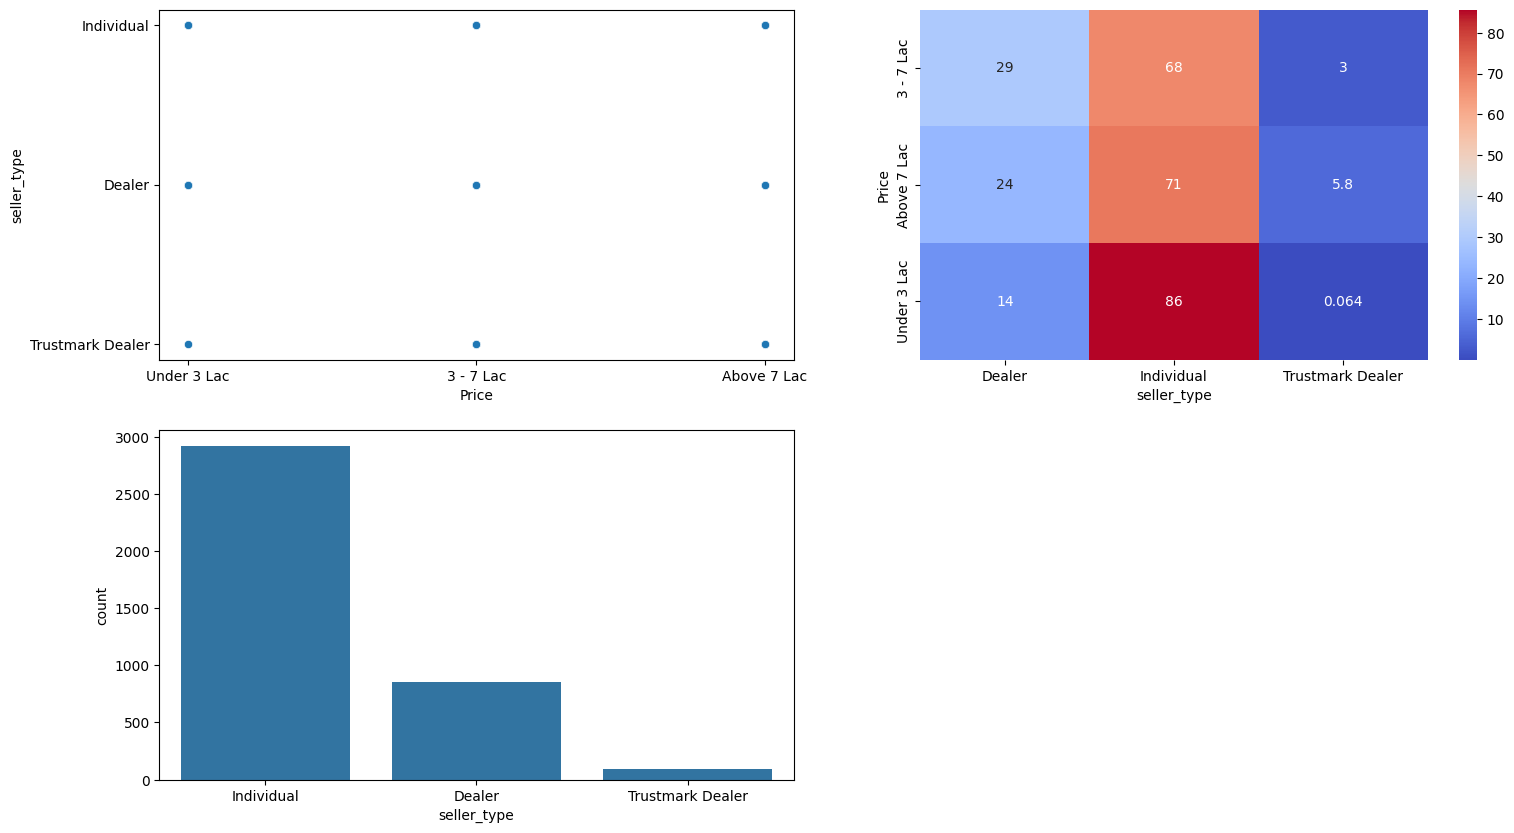

In [36]:
b = pd.crosstab(df1['Price'],df1['seller_type'],normalize = 'index')*100
print(b)
bia(df1,'Price','seller_type',b)


In [37]:
df1[df1['seller_type'] == 'Individual'].shape[0]/len(df1['seller_type'])*100

75.58320373250389

## price to year
conclusion
-  

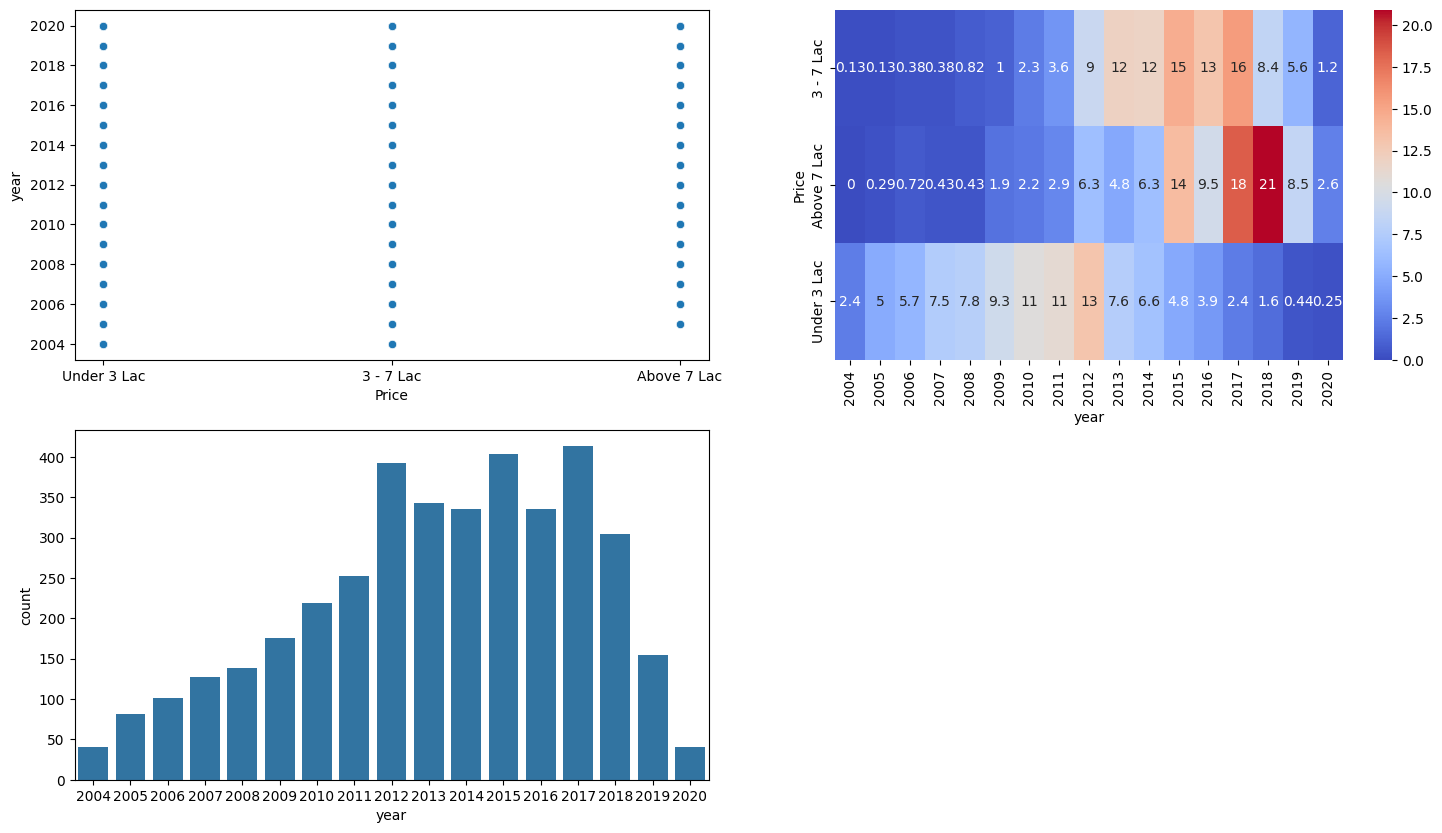

year             2004      2005      2006      2007      2008      2009  \
Price                                                                     
3 - 7 Lac    0.125707  0.125707  0.377121  0.377121  0.817096  1.005657   
Above 7 Lac  0.000000  0.288600  0.721501  0.432900  0.432900  1.875902   
Under 3 Lac  2.414231  4.955527  5.717916  7.496823  7.814485  9.339263   

year              2010       2011       2012       2013       2014       2015  \
Price                                                                           
3 - 7 Lac     2.325581   3.645506   8.988058  11.942175  11.816468  14.582024   
Above 7 Lac   2.164502   2.886003   6.349206   4.761905   6.349206  13.708514   
Under 3 Lac  10.609911  11.054638  13.024142   7.623888   6.607370   4.828463   

year              2016       2017       2018      2019      2020  
Price                                                             
3 - 7 Lac    13.073539  15.587681   8.422376  5.593966  1.194217  
Above 7 Lac   9.523810  18.470418  20.923521  8.513709  2.597403  
Under 3 Lac   3.875476   2.350699   1.588310  0.444727  0.254130

In [38]:
b = pd.crosstab(df1['Price'],df1['year'],normalize = 'index')*100
bia(df1,'Price','year',b)
b

In [39]:
def name(data):
    return data.split(' ')[0]
df1['company'] = df1.name.apply(name)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1392\2695216399.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
df1.head()

name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner        Price      Running  company  
0  Individual       Manual   First Owner  Under 3 Lac  50K - 1 Lac   Maruti  
1  Individual       Manual   First Owner  Under 3 Lac  50K - 1 Lac   Maruti  
2  Individual       Manual   First Owner    3 - 7 Lac  50K - 1 Lac  Hyundai  
3  Individual       Manual   First Owner  Under 3 Lac  Under 50000   Datsun  
4  Individual       Manual  Second Owner    3 - 7 Lac  1L - 1.5Lac    Honda

In [41]:
df1['company'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Skoda', 'Toyota', 'Mercedes-Benz', 'Mahindra', 'Ford', 'Nissan',
       'Renault', 'Fiat', 'Volkswagen', 'Audi', 'Mitsubishi', 'Force',
       'OpelCorsa', 'BMW', 'Ambassador'], dtype=object)

## price to company
conclusion
- Mostly there are cars selling price under 3 lac. maruti cars more sell ratio.and maruti is amlost good selling car all price.customer is highly like the maruti car
- And second hyundai is highly selling brand.its manufacture petrol cars  
- why maruti selling ratio is high
  -  because maruti is manufacture petrol cars.customer are buy petrol.because petrol getting under the 3lac


In [42]:
c = pd.crosstab(df1['Price'],df1['company'],normalize = 'index')*100
pd.set_option('display.max_columns',None)
c

company      Ambassador      Audi       BMW  Chevrolet    Datsun      Fiat  \
Price                                                                        
3 - 7 Lac      0.062854  0.062854  0.062854   2.262728  0.942803  0.754243   
Above 7 Lac    0.000000  0.721501  0.721501   1.154401  0.288600  0.144300   
Under 3 Lac    0.127065  0.000000  0.000000   8.894536  1.270648  1.397713   

company         Force      Ford     Honda    Hyundai   Mahindra     Maruti  \
Price                                                                        
3 - 7 Lac    0.062854  5.782527  8.233815  21.307354   9.616593  28.409805   
Above 7 Lac  0.000000  8.225108  9.956710  17.604618  14.430014  22.655123   
Under 3 Lac  0.000000  4.383736  2.160102  20.203304   2.922490  37.865311   

company      Mercedes-Benz  Mitsubishi    Nissan  OpelCorsa   Renault  \
Price                                                                   
3 - 7 Lac         0.062854    0.062854  2.199874   0.000000  5.468259   
Above 7 Lac       0.865801    0.577201  1.587302   0.000000  4.617605   
Under 3 Lac       0.000000    0.000000  1.080051   0.063532  1.651842   

company         Skoda       Tata    Toyota  Volkswagen  
Price                                                   
3 - 7 Lac    2.388435   4.588309  4.274041    3.394092  
Above 7 Lac  2.020202   4.040404  6.782107    3.607504  
Under 3 Lac  0.635324  14.930114  0.825921    1.588310

<Axes: xlabel='company', ylabel='Price'>

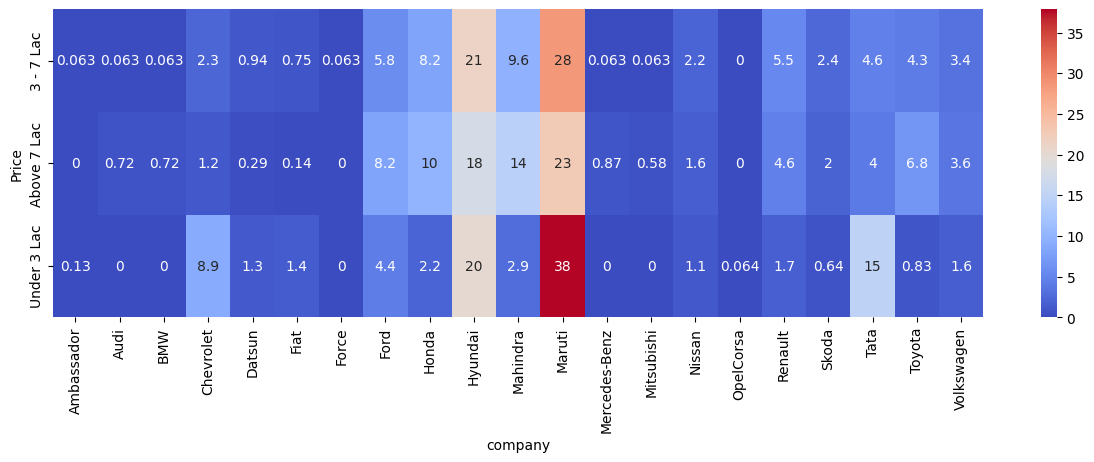

In [43]:
plt.figure(figsize = (15,4))
sns.heatmap(c,cmap = 'coolwarm',annot = True)

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning:

Whe

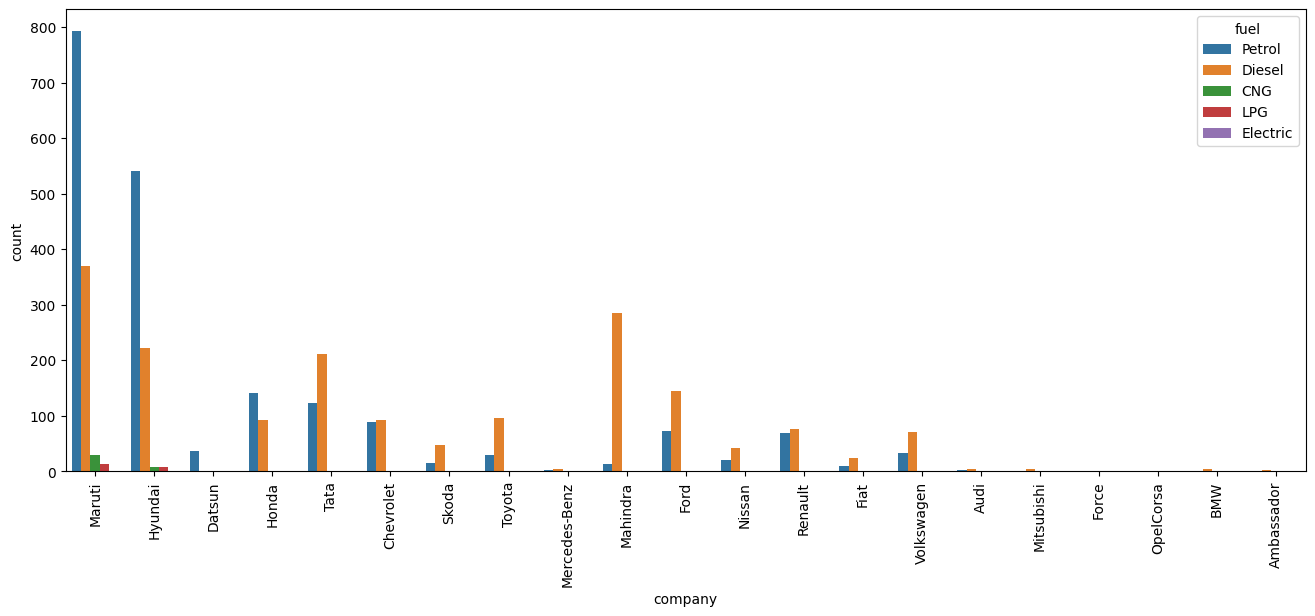

In [44]:
plt.figure(figsize = (16,6))
ax = sns.countplot(x = df1['company'],hue = df1['fuel'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

## Price to selling_price
conclusion
- look.car running in less price is high and other car running is high price is low


In [45]:
df1.groupby(['Price','Running'])['selling_price'].mean().reset_index()

Price       Running  selling_price
0     3 - 7 Lac   1L - 1.5Lac  450472.361963
1     3 - 7 Lac   50K - 1 Lac  469846.786127
2     3 - 7 Lac  Above 1.5Lac  445903.193548
3     3 - 7 Lac   Under 50000  494503.507801
4   Above 7 Lac   1L - 1.5Lac  641758.048387
5   Above 7 Lac   50K - 1 Lac  698243.105882
6   Above 7 Lac  Above 1.5Lac  666666.666667
7   Above 7 Lac   Under 50000  770580.348774
8   Under 3 Lac   1L - 1.5Lac  164657.313869
9   Under 3 Lac   50K - 1 Lac  170682.171008
10  Under 3 Lac  Above 1.5Lac  175735.235294
11  Under 3 Lac   Under 50000  202527.843342

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning:

Whe

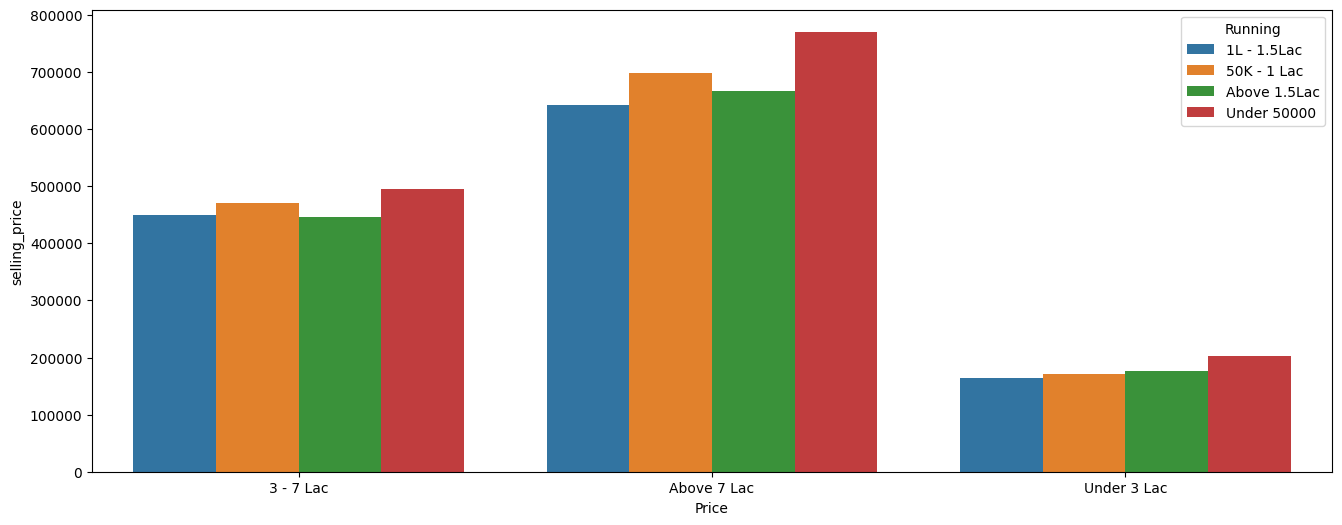

In [47]:
plt.figure(figsize = (16,6))
d = df1.groupby(['Price','Running'])['selling_price'].mean().reset_index()
ax = sns.barplot(x = d['Price'],y = d['selling_price'],hue = d['Running'])
#for i in range(len(d)):
 #   ax.bar_label(ax.containers[i])
plt.show()

## price to km_driven
conclusion
- This is a average running km in according to price category
- under 3 lac cars car running is too high

In [48]:
df1.groupby(['Price','Running'])['km_driven'].mean().reset_index()

Price       Running      km_driven
0     3 - 7 Lac   1L - 1.5Lac  119607.411043
1     3 - 7 Lac   50K - 1 Lac   72024.364162
2     3 - 7 Lac  Above 1.5Lac  159271.161290
3     3 - 7 Lac   Under 50000   24847.686525
4   Above 7 Lac   1L - 1.5Lac  119676.548387
5   Above 7 Lac   50K - 1 Lac   67880.741176
6   Above 7 Lac  Above 1.5Lac  159652.222222
7   Above 7 Lac   Under 50000   24595.722071
8   Under 3 Lac   1L - 1.5Lac  118731.065693
9   Under 3 Lac   50K - 1 Lac   73181.635334
10  Under 3 Lac  Above 1.5Lac  157952.235294
11  Under 3 Lac   Under 50000   32040.109661

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning:

Whe

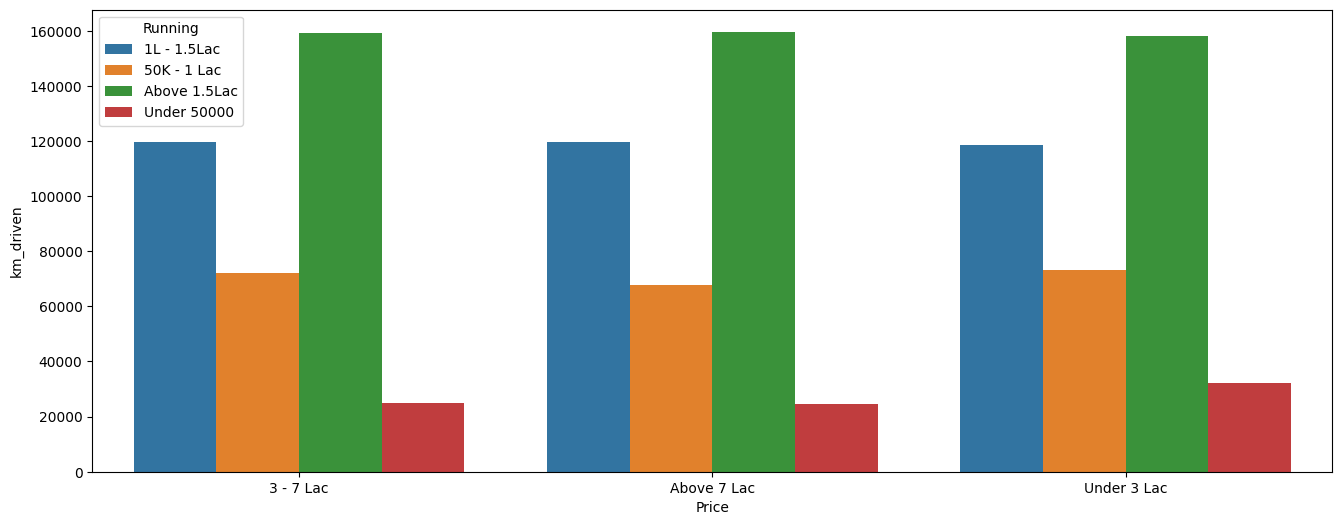

In [59]:
plt.figure(figsize = (16,6))
d = df1.groupby(['Price','Running'])['km_driven'].mean().reset_index()
ax = sns.barplot(x = d['Price'],y = d['km_driven'],hue = d['Running'])
#for i in dl:
 #   ax.bar_label(ax.containers[i])
plt.show()

In [60]:
df1

name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner        Price      Running  \
0     Petrol  Individual       Manual   First Owner  Under 3 Lac  50K - 1 Lac   
1     Petrol  Individual       Manual   First Owner  Under 3 Lac  50K - 1 Lac   
2     Diesel  Individual       Manual   First Owner    3 - 7 Lac  50K - 1 Lac   
3     Petrol  Individual       Manual   First Owner  Under 3 Lac  Under 50000   
4     Diesel  Individual       Manual  Second Owner    3 - 7 Lac  1L - 1.5Lac   
...      ...         ...          ...           ...          ...          ...   
4335  Diesel  Individual       Manual  Second Owner    3 - 7 Lac  50K - 1 Lac   
4336  Diesel  Individual       Manual  Second Owner    3 - 7 Lac  50K - 1 Lac   
4337  Petrol  Individual       Manual  Second Owner  Under 3 Lac  50K - 1 Lac   
4338  Diesel  Individual       Manual   First Owner  Above 7 Lac  50K - 1 Lac   
4339  Petrol  Individual       Manual   First Owner  Under 3 Lac  Under 50000   

      company  
0      Maruti  
1      Maruti  
2     Hyundai  
3      Datsun  
4       Honda  
...       ...  
4335  Hyundai  
4336  Hyundai  
4337   Maruti  
4338  Hyundai  
4339  Renault  

[3858 rows x 11 columns]